# Metoda dziel i rządź dla SVD

Implementacja metody dziel i zwyciężaj dla SVD.
Metoda opisana była na wykładzie.

Opis (z grubsza) algorytmu:
- Redukcja do macierzy dwudiagonalnej
- Rozbicie macierzy
- Rozwiązanie problemu SVD dla dwóch mniejszych macierzy
- Obliczenie wyniku na podstawie uzyskanych macierzy
  - Wyznaczenie wartości własnych mniejszej macierzy
  - Deflacja
  - Wyszukiwanie miejsc zerowych zadanej funkcji

In [1]:
import numpy as np

from divide_and_conquer_svd import divide_and_conquer_svd

A = np.array([
    [1., 2.],
    [3., 4.],
    [10., 12.],
], dtype=float)
m, n = A.shape

U, S, VT = divide_and_conquer_svd(A, 1e-8)

print('U jest ortogonalne:', np.allclose(U.T @ U, np.eye(m)))
print('V jest ortogonalne:', np.allclose(VT.T @ VT, np.eye(n)))
print('U S VT = A        :', np.allclose(U @ S @ VT, A))

U jest ortogonalne: True
V jest ortogonalne: True
U S VT = A        : True


In [38]:
A = np.array([
    [1., 2., 12., -123., 21., 1.],
    [3., 4., 23., 123., 67., 9.],
    [10., 12., 43., -4., -91., 4.],
    [11., -5., -32., 7., 3., -9.],
    [-4., 91., 5., 32., -9., 11.],
], dtype=float)
m, n = A.shape

U, S, VT = divide_and_conquer_svd(A, 1e-8)

print('||U - I||     :', np.linalg.norm(U.T @ U - np.eye(m)))
print('||V - I||     :', np.linalg.norm(VT.T @ VT - np.eye(n)))
print('||U S VT - A||:', np.linalg.norm(U @ S @ VT - A))

||U - I||     : 2.2943767170787948e-07
||V - I||     : 7.468229481022694e-07
||U S VT - A||: 3.229292507205404e-05


In [39]:
A = np.random.randn(10, 20)
m, n = A.shape

U, S, VT = divide_and_conquer_svd(A, 1e-8)

print('||U - I||     :', np.linalg.norm(U.T @ U - np.eye(m)))
print('||V - I||     :', np.linalg.norm(VT.T @ VT - np.eye(n)))
print('||U S VT - A||:', np.linalg.norm(U @ S @ VT - A))

||U - I||     : 3.287298247570118e-06
||V - I||     : 3.590387737524206e-06
||U S VT - A||: 1.2706302077999382e-05


A teraz przykład z życia wzięty. Kompresja zdjęć.

In [40]:
from PIL import Image
import matplotlib.pyplot as plt


def load_image(path_to_image: str, shape: tuple[int, int] = (500, 500), max_len=None) -> np.ndarray:
    img = Image.open(path_to_image).convert("L")
    if max_len:
        max_real_len = max(img.width, img.height)
        scale = max_real_len / max_len
        new_size = (int(img.width / scale), int(img.height / scale))
        img = img.resize(new_size)
    else:
        img = img.resize(shape)

    return np.array(
        img,
        dtype=float,
    )


def compress_image(
        path_to_image: str,
        k: int = 50,
        tol: float = 1e-10,
        shape: tuple[int, int] = (500, 500),
        max_len=None
):
    image_matrix = load_image(path_to_image, shape=shape, max_len=max_len)
    U, S, VT = divide_and_conquer_svd(image_matrix, tol)

    U_k = U[:, :k]
    S_k = S[:k, :k]
    VT_k = VT[:k, :]

    compressed = U_k @ S_k @ VT_k
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_matrix, cmap="gray")
    plt.title("Original")
    plt.subplot(1, 2, 2)
    plt.imshow(compressed, cmap="gray")
    plt.title(f"Reconstructed {k=}")
    plt.show()

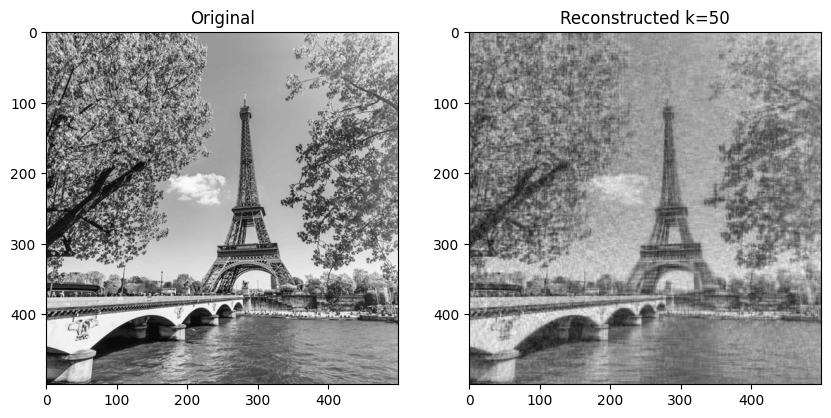

In [41]:
compress_image('paris.jpg')

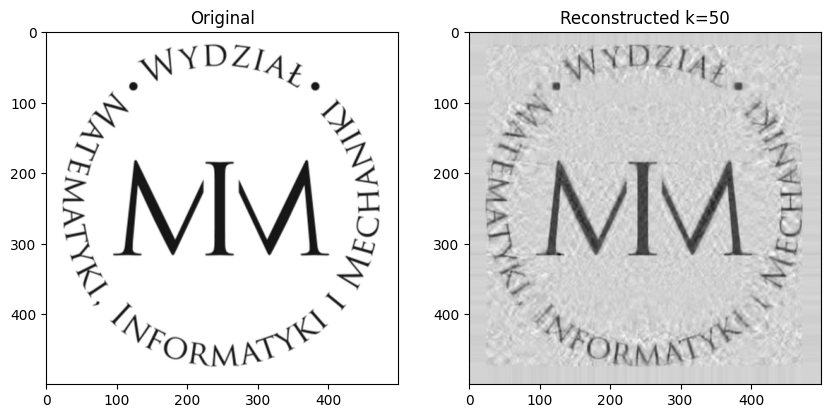

In [42]:
compress_image('mimlogo.jpg')

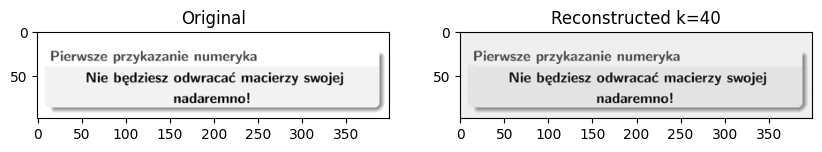

In [43]:
compress_image('monolog.png', k=40, max_len=400)

Przykłady losowych macierzy.

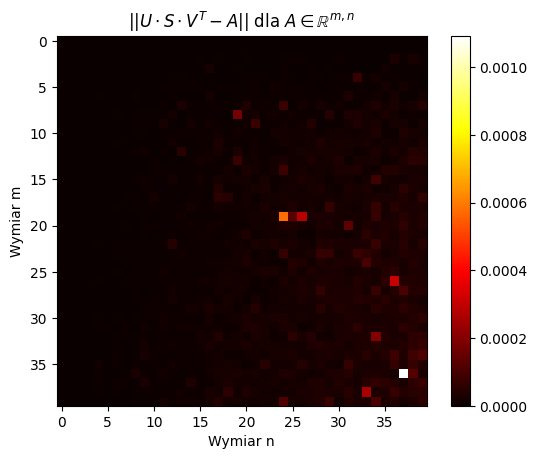

In [44]:
N = 40
D_ij = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        diffs = []
        for k in range(10):
            random_A = np.random.randn(i, j)
            u_i, s_i, vt_i = divide_and_conquer_svd(random_A, tol=1e-10)
            diff = np.linalg.norm(u_i @ s_i @ vt_i - random_A)
            diffs.append(diff)

        D_ij[i, j] = sum(diffs) / len(diffs)

plt.imshow(D_ij, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('$||U\cdot S\cdot V^T - A||$ dla $A \in \mathbb{R}^{m, n}$')
plt.ylabel("Wymiar m")
plt.xlabel("Wymiar n")
plt.show()